# Ch 9 Multi-Agent Reinforcement Learning

### 다중 에이전트 강화학습
- Mean Field Multi-Agent Reinforcement Learning(Yaodong Yang, 2018)
- 평균장 Q학습(mean field Q-learning, MF-Q) 알고리즘

NPC들은 환경과 같이 취급, 상호작용하지 않는다. 하지만 다수의 에이전트가 상호작용하는 환경이라면?
- DQN으로 표현 어려움, 시불변 법칙이 지켜지기 않기 때문에.. 다중 에이전트 시나리오에서 모든 에이전트는 강화학습 에이전트 이므로 해당 정책이 환경에 따라 끊임없이 변함. 따라서 수렴을 보장하지 않고 학습 성능이 많이 떨어짐
- 동작을 보통 원핫 벡터로 표현하는데 에이전트가 많아질수록 동작을 표현하기 위한 조합이 기하급수적으로 늘어남

다중 에이전트 문제를 필요하기 위헤 이웃에 대한 에이전트만 영향을 받기 때문에 이웃 영역 Q학습, 부분공간 Q학습 방법 제안 됨
- 초기에는 무작위로 초기화해서 이웃 에이전트 동작 가져오고 반복하면서 에이전트의 Q함수 기반한 동작 받아옴
- 이웃을 정의하는 부분, 그 이웃 에이전트들의 결합 동작 표현을 산출하는 함수 필요

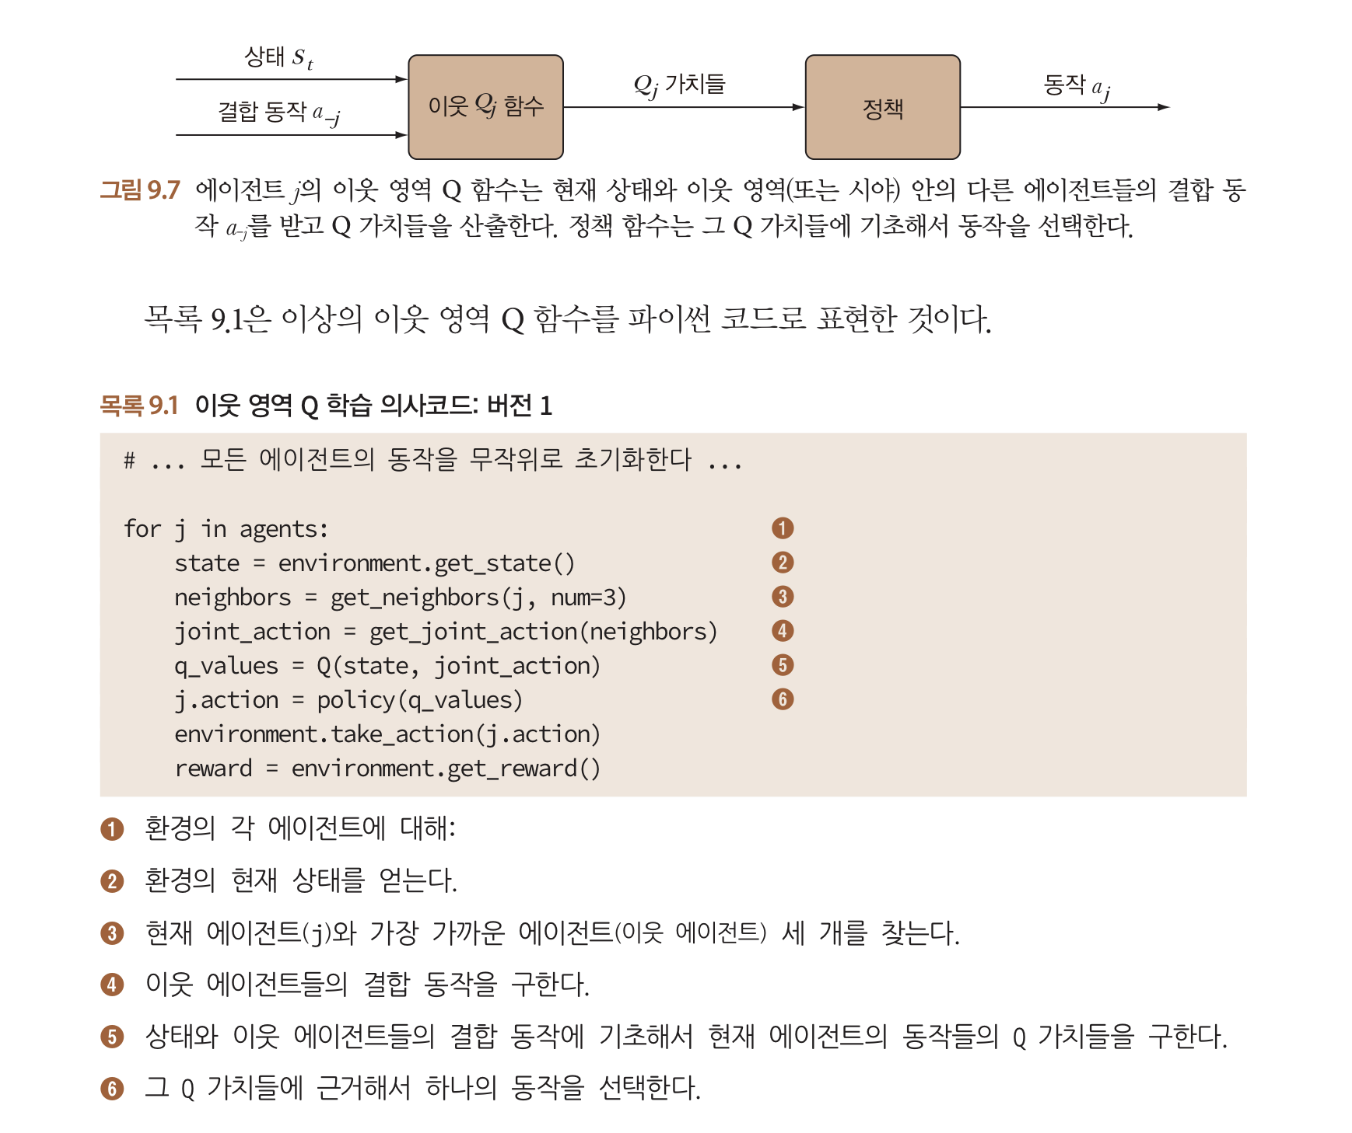

##### Listing 9.3
1차원 이징 모형문제를 MARL에 적용
- 빌헬름 렌츠와 에른스트 이징이 서술한 물리학 문제
- 모든 전자에는 스핀이라는 속성이 있고, 스핀은 위, 아래 방향을 가짐, 이 방향이 자기장의 극(N 또는 S)를 결정
- 개별 원자들은 주변과 같은 방향으로 정렬하려는 경향이 있지만 (모든 물리계의 더 낮은 에너지로 향하려는 경향 때문에) 같은 방향의 전자들이 많아질수록 자기장이 증가해서 물질 안에 내부 압력이 생겨 불안정해짐
- 이런 이유로 모든 전자가 고르게 정렬되지 않고 스핀 방향이 같은 전자들이 모인 군집이 생김
- 자기구역 (magnetic domain) : 국소적으로는 전자들의 방향 정렬해서 에너지 최소화
- 하나의 물질은 이러한 자기구역들의 상호작용으로 생성
- 한 원자가 오직 가까운 이웃 전자들에게만 영향 받는다는 문제 = 이웃 영역 Q학습과 동일

MARL 모형화
- 전자가 스핀 방향 바꾸는 것 : 동작
- 전자 에너지 : 보상 (같은 방향으로 바꾼 전자는 긍정 보상, 반대는 부정 보상) => 자신의 보상을 최대화 하려는 것이 물리학 관점에서는 전자가 자신이 가진 에너지를 최소화하려는 경향
- 모든 전자가 보상 최대화하려하면 모두 같은 방향으로 정렬해서 하나의 자석이 될 뿐 자기 구역 형성되지 않음
- 전체 에너지 증가에 따른 제약을 흉내내기 위해 무작위성 도입 (물체의 온도 변화 - 탐험과 활용으로 적용)

이징모형 생성
- 아래스핀은 0, 위 스핀은 1인 이진수 격자 생성 (1차원 벡터 또는 2차원 행렬로 표현)

## 1차원 이징 모형

1차원 이진수 격자는 끝과 끝이 연결된 순한 격자 : 어디?
- 1차원 격자의 이웃(S)은 자신의 왼쪽, 오른쪽 이웃이 됨
- 제일 왼쪽, 오른쪽 전자를 위해 순환 격자형식

이웃을 정의하는 부분 : 1차원 왼쪽, 오른쪽
그 이웃 에이전트들의 결합 동작 표현을 산출하는 함수 : 에이전트들의 동작 원핫 벡터를 외적하는 방법으로 구함 (벡터를 행렬로 변환해서 계산 가능)



In [11]:
import numpy as np
import torch
from matplotlib import pyplot as plt

# 0, 1은 스핀의 방향을 나타냄 (위, 아래) - agent의 동작 2가지
def init_grid(size=(10,)):
    grid = torch.randn(*size) # torch.randn : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
    grid[grid > 0] = 1
    grid[grid <= 0] = 0
    grid = grid.byte() #A 10개의 0 또는 1로 구성된 바이트가 1차원 이진 격자가 됨, byte는 0~255 숫자로 구성, 왜 byte로 변환했찌?
    print(grid) # https://pytorch.org/docs/stable/generated/torch.Tensor.byte.html 
    return grid

# s:이진목록 (이웃 전자-이웃 영역 에이전트), a:하나의 이진수 (현재 전자-에이전트)
def get_reward(s,a): #B 
    r = -1
    for i in s:
        if i == a:
            r += 0.9
    r *= 2. # 곱하는 이유 있나?
    print(r)
    return r

tensor([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=torch.uint8)


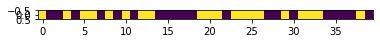

In [12]:
size = (40,)
grid=init_grid(size=size)
grid
plt.imshow(np.expand_dims(grid,0)) # plt.imshow는 3차원 텐서/행렬만 지원하므로 차원 확대

##### Listing 9.4
신경망에서 사용할 매개변수 벡터 목록 생성  
cf) 다른 MARL에서는 모든 에이전트 정책이 동일할때 하나의 신경망을 재사용해도 됨 (Q함수 공유)

In [13]:
def gen_params(N,size): #A
    ret = []
    for i in range(N):
        vec = torch.randn(size) / 10.
        vec.requires_grad = True
        ret.append(vec)
    return ret


##### Listing 9.5
상태 벡터 하나와 매개변수 벡터 받아서 여러 개의 행렬을 만들고 신경망 층으로 사용


In [3]:
# Q 함수
def qfunc(s,theta,layers=[(4,20),(20,2)],afn=torch.tanh):
    l1n = layers[0] 
    l1s = np.prod(l1n) #A 첫 튜플에 가진 두 값 곱, 첫 층을 만들기 위해 theta 벡터에서 추출할 부분집합의 크기로 쓰임
    theta_1 = theta[0:l1s].reshape(l1n) #B 첫 층에 필요한 성분 추출해서 하나의 행렬로 변환
    l2n = layers[1]
    l2s = np.prod(l2n)
    theta_2 = theta[l1s:l2s+l1s].reshape(l2n)
    bias = torch.ones((1,theta_1.shape[1])) # bias
    l1 = s @ theta_1 + bias #C 신경망 첫 층의 계산, s는 결합 동작벡터(4X1 행렬), 1차원 좌우 에이전트 동작이라서 4개?
    l1 = torch.nn.functional.elu(l1)
    l2 = afn(l1 @ theta_2) #D tanh 활성화 함수 사용
    return l2.flatten()

##### Listing 9.6

In [4]:
def get_substate(b): #A
    s = torch.zeros(2) 
    if b > 0: #B 입력 기반으로 동작 벡터 산출
        s[1] = 1
    else:
        s[0] = 1
    return s

def joint_state(s): #C
    s1_ = get_substate(s[0]) #D S[0]은 왼쪽 전자 S[1]은 오른쪽 전자스핀 방향
    s2_ = get_substate(s[1])
    ret = (s1_.reshape(2,1) @ s2_.reshape(1,2)).flatten() #E [0,1] 위 방향 스핀, [1,0] 아래방향 스핀
    return ret

##### Listing 9.7

tensor([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
       dtype=torch.uint8)


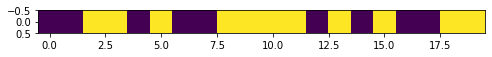

In [5]:
plt.figure(figsize=(8,5))
size = (20,) #A 격자 길이가 20개인 벡터
hid_layer = 20 #B Q 함수는 2층 신경망? 20개의 hidden layer로 구성
params = gen_params(size[0],4*hid_layer+hid_layer*2) #C
grid = init_grid(size=size)
grid_ = grid.clone() #D
print(grid)
plt.imshow(np.expand_dims(grid,0))

##### Listing 9.8

In [6]:
epochs = 200
lr = 0.001 #A
losses = [[] for i in range(size[0])] #B
for i in range(epochs):
    for j in range(size[0]): #C
        l = j - 1 if j - 1 >= 0 else size[0]-1 #D
        r = j + 1 if j + 1 < size[0] else 0 #E
        state_ = grid[[l,r]] #F
        state = joint_state(state_) #G
        qvals = qfunc(state.float().detach(),params[j],layers=[(4,hid_layer),(hid_layer,2)])
        qmax = torch.argmax(qvals,dim=0).detach().item() #H
        action = int(qmax)
        grid_[j] = action #I
        reward = get_reward(state_.detach(),action)
        with torch.no_grad(): #J
            target = qvals.clone()
            target[action] = reward
        loss = torch.sum(torch.pow(qvals - target,2))
        losses[j].append(loss.detach().numpy())
        loss.backward()
        with torch.no_grad(): #K
            params[j] = params[j] - lr * params[j].grad
        params[j].requires_grad = True
    with torch.no_grad(): #L
        grid.data = grid_.data

##### Visualization of 1D Ising Model

tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       dtype=torch.uint8) tensor(11)


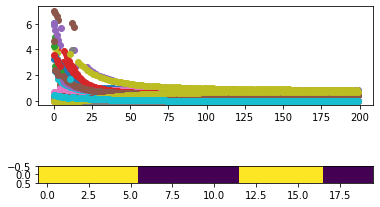

In [7]:
fig,ax = plt.subplots(2,1)
for i in range(size[0]):
    ax[0].scatter(np.arange(len(losses[i])),losses[i])
print(grid,grid.sum())
ax[1].imshow(np.expand_dims(grid,0))

##### Listing 9.9

In [8]:
from collections import deque #A
from random import shuffle #B

def softmax_policy(qvals,temp=0.9): #C
    soft = torch.exp(qvals/temp) / torch.sum(torch.exp(qvals/temp)) #D
    action = torch.multinomial(soft,1) #E
    return action

##### Listing 9.10

In [9]:
def get_coords(grid,j): #A
    x = int(np.floor(j / grid.shape[0])) #B
    y = int(j - x * grid.shape[0]) #C
    return x,y

def get_reward_2d(action,action_mean): #D
    r = (action*(action_mean-action/2)).sum()/action.sum() #E
    return torch.tanh(5 * r) #F

In [10]:
x1 = get_reward_2d(torch.Tensor([1,0]),torch.Tensor([0.25, 0.75]))
x2 = get_reward_2d(torch.Tensor([0,1]),torch.Tensor([0.25, 0.75]))
print(x1,x2)

tensor(-0.8483) tensor(0.8483)


##### Listing 9.11

In [11]:
def mean_action(grid,j):
    x,y = get_coords(grid,j) #A
    action_mean = torch.zeros(2) #B
    for i in [-1,0,1]: #C
        for k in [-1,0,1]:
            if i == k == 0:
                continue
            x_,y_ = x + i, y + k
            x_ = x_ if x_ >= 0 else grid.shape[0] - 1
            y_ = y_ if y_ >= 0 else grid.shape[1] - 1
            x_ = x_ if x_ <  grid.shape[0] else 0
            y_ = y_ if y_ < grid.shape[1] else 0
            cur_n = grid[x_,y_]
            s = get_substate(cur_n) #D
            action_mean += s
    action_mean /= action_mean.sum() #E
    return action_mean

tensor(48)


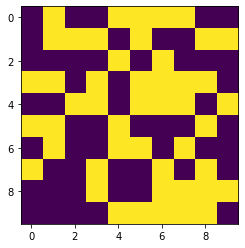

In [12]:
size = (10,10)
J = np.prod(size) 
hid_layer = 10
layers = [(2,hid_layer),(hid_layer,2)]
params = gen_params(1,2*hid_layer+hid_layer*2)
grid = init_grid(size=size)
grid_ = grid.clone()
grid__ = grid.clone()
plt.imshow(grid)
print(grid.sum())

##### Listing 9.12

In [13]:
epochs = 75
lr = 0.0001
num_iter = 3 #A 
losses = [ [] for i in range(size[0])] #B
replay_size = 50 #C
replay = deque(maxlen=replay_size) #D
batch_size = 10 #E
gamma = 0.9 #F
losses = [[] for i in range(J)]

for i in range(epochs): 
    act_means = torch.zeros((J,2)) #G
    q_next = torch.zeros(J) #H
    for m in range(num_iter): #I
        for j in range(J): #J
            action_mean = mean_action(grid_,j).detach()
            act_means[j] = action_mean.clone()
            qvals = qfunc(action_mean.detach(),params[0],layers=layers)
            action = softmax_policy(qvals.detach(),temp=0.5)
            grid__[get_coords(grid_,j)] = action
            q_next[j] = torch.max(qvals).detach()
        grid_.data = grid__.data
    grid.data = grid_.data
    actions = torch.stack([get_substate(a.item()) for a in grid.flatten()])
    rewards = torch.stack([get_reward_2d(actions[j],act_means[j]) for j in range(J)])
    exp = (actions,rewards,act_means,q_next) #K
    replay.append(exp)
    shuffle(replay)
    if len(replay) > batch_size: #L
        ids = np.random.randint(low=0,high=len(replay),size=batch_size) #M
        exps = [replay[idx] for idx in ids]
        for j in range(J):
            jacts = torch.stack([ex[0][j] for ex in exps]).detach()
            jrewards = torch.stack([ex[1][j] for ex in exps]).detach()
            jmeans = torch.stack([ex[2][j] for ex in exps]).detach()
            vs = torch.stack([ex[3][j] for ex in exps]).detach()
            qvals = torch.stack([ qfunc(jmeans[h].detach(),params[0],layers=layers) \
                                 for h in range(batch_size)])
            target = qvals.clone().detach()
            target[:,torch.argmax(jacts,dim=1)] = jrewards + gamma * vs
            loss = torch.sum(torch.pow(qvals - target.detach(),2))
            losses[j].append(loss.item())
            loss.backward()
            with torch.no_grad():
                params[0] = params[0] - lr * params[0].grad
            params[0].requires_grad = True

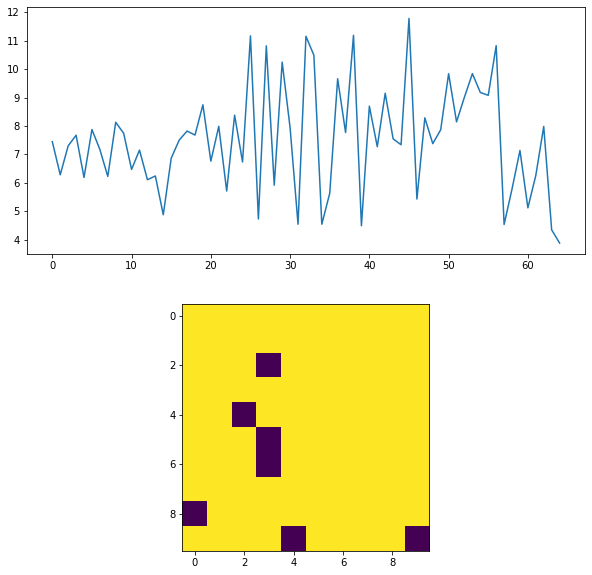

In [14]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(10,10)
ax[0].plot(np.array(losses).mean(axis=0))
ax[1].imshow(grid)

##### Listing 9.13

In [16]:
# import magent
# import math
# from scipy.spatial.distance import cityblock #A
# map_size = 30
# env = magent.GridWorld("battle", map_size=map_size) #B
# env.set_render_dir("MAgent/build/render") #C
# team1, team2 = env.get_handles() #D

##### Listing 9.14

In [ ]:
hid_layer = 25
in_size = 359
act_space = 21
layers = [(in_size,hid_layer),(hid_layer,act_space)]
params = gen_params(2,in_size*hid_layer+hid_layer*act_space) #A
map_size = 30
width = height = map_size
n1 = n2 = 16 #B
gap = 1 #C
epochs = 100
replay_size = 70
batch_size = 25


side1 = int(math.sqrt(n1)) * 2
pos1 = []
for x in range(width//2 - gap - side1, width//2 - gap - side1 + side1, 2): #D
    for y in range((height - side1)//2, (height - side1)//2 + side1, 2):
        pos1.append([x, y, 0])

side2 = int(math.sqrt(n2)) * 2
pos2 = []
for x in range(width//2 + gap, width//2 + gap + side2, 2): #E
    for y in range((height - side2)//2, (height - side2)//2 + side2, 2):
        pos2.append([x, y, 0])
        
env.reset()
env.add_agents(team1, method="custom", pos=pos1) #F
env.add_agents(team2, method="custom", pos=pos2)


In [ ]:
plt.imshow(env.get_global_minimap(30,30)[:,:,:].sum(axis=2))

##### Listing 9.15

In [ ]:
def get_neighbors(j,pos_list,r=6): #A
    neighbors = []
    pos_j = pos_list[j]
    for i,pos in enumerate(pos_list):
        if i == j:
            continue
        dist = cityblock(pos,pos_j)
        if dist < r:
            neighbors.append(i)
    return neighbors


In [ ]:
get_neighbors(5,env.get_pos(team1))

##### Listing 9.16

In [ ]:
def get_onehot(a,l=21): #A
    x = torch.zeros(21)
    x[a] = 1
    return x

def get_scalar(v): #B
    return torch.argmax(v)

def get_mean_field(j,pos_list,act_list,r=7,l=21): #C
    neighbors = get_neighbors(j,pos_list,r=r) #D
    mean_field = torch.zeros(l)
    for k in neighbors:
        act_ = act_list[k]
        act = get_onehot(act_)
        mean_field += act
    tot = mean_field.sum()
    mean_field = mean_field / tot if tot > 0 else mean_field #E
    return mean_field

##### Listing 9.17

In [ ]:
def infer_acts(obs,param,layers,pos_list,acts,act_space=21,num_iter=5,temp=0.5):
    N = acts.shape[0] #A
    mean_fields = torch.zeros(N,act_space)
    acts_ = acts.clone() #B
    qvals = torch.zeros(N,act_space)

    for i in range(num_iter): #C
        for j in range(N): #D
            mean_fields[j] = get_mean_field(j,pos_list,acts_)

        for j in range(N): #E
            state = torch.cat((obs[j].flatten(),mean_fields[j]))
            qs = qfunc(state.detach(),param,layers=layers)
            qvals[j,:] = qs[:]
            acts_[j] = softmax_policy(qs.detach(),temp=temp)
    return acts_, mean_fields, qvals

def init_mean_field(N,act_space=21):
    mean_fields = torch.abs(torch.rand(N,act_space))
    for i in range(mean_fields.shape[0]):
        mean_fields[i] = mean_fields[i] / mean_fields[i].sum()
    return mean_fields

##### Listing 9.18

In [ ]:
def train(batch_size,replay,param,layers,J=64,gamma=0.5,lr=0.001):
    ids = np.random.randint(low=0,high=len(replay),size=batch_size)
    exps = [replay[idx] for idx in ids]
    losses = []
    jobs = torch.stack([ex[0] for ex in exps]).detach() #stack
    jacts = torch.stack([ex[1] for ex in exps]).detach()
    jrewards = torch.stack([ex[2] for ex in exps]).detach()
    jmeans = torch.stack([ex[3] for ex in exps]).detach()
    vs = torch.stack([ex[4] for ex in exps]).detach()
    qs = []
    for h in range(batch_size):
        state = torch.cat((jobs[h].flatten(),jmeans[h]))
        qs.append(qfunc(state.detach(),param,layers=layers))
    qvals = torch.stack(qs)
    target = qvals.clone().detach()
    target[:,jacts] = jrewards + gamma * torch.max(vs,dim=1)[0] #20 = 20 + 20
    loss = torch.sum(torch.pow(qvals - target.detach(),2))
    losses.append(loss.detach().item())
    loss.backward()
    #SGD
    with torch.no_grad():
        param = param - lr * param.grad
    param.requires_grad = True
    return np.array(losses).mean()

##### Listing 9.19

In [ ]:
N1 = env.get_num(team1) #A
N2 = env.get_num(team2)
step_ct = 0
acts_1 = torch.randint(low=0,high=act_space,size=(N1,)) #B
acts_2 = torch.randint(low=0,high=act_space,size=(N2,))

replay1 = deque(maxlen=replay_size) #C
replay2 = deque(maxlen=replay_size)

qnext1 = torch.zeros(N1) #D
qnext2 = torch.zeros(N2)

act_means1 = init_mean_field(N1,act_space)  #E
act_means2 = init_mean_field(N2,act_space)

rewards1 = torch.zeros(N1) #F
rewards2 = torch.zeros(N2)

losses1 = []
losses2 = []

##### Listing 9.20

In [ ]:
def team_step(team,param,acts,layers):
    obs = env.get_observation(team) #A
    ids = env.get_agent_id(team) #B
    obs_small = torch.from_numpy(obs[0][:,:,:,[1,4]]) #C
    agent_pos = env.get_pos(team) #D 
    acts, act_means, qvals = infer_acts(obs_small,\
                                       param,layers,agent_pos,acts) #E
    return acts, act_means, qvals, obs_small, ids

def add_to_replay(replay,obs_small, acts,rewards,act_means,qnext): #F
    for j in range(rewards.shape[0]): #G
        exp = (obs_small[j], acts[j],rewards[j],act_means[j],qnext[j])
        replay.append(exp)
        
    return replay

##### Listing 9.21

In [ ]:
for i in range(epochs):
    done = False
    while not done: #A
        acts_1, act_means1, qvals1, obs_small_1, ids_1 = \
            team_step(team1,params[0],acts_1,layers) #B
        env.set_action(team1, acts_1.detach().numpy().astype(np.int32)) #C

        acts_2, act_means2, qvals2, obs_small_2, ids_2 = \
            team_step(team2,params[0],acts_2,layers)
        env.set_action(team2, acts_2.detach().numpy().astype(np.int32))

        done = env.step() #D

        _, _, qnext1, _, ids_1 = team_step(team1,params[0],acts_1,layers) #E
        _, _, qnext2, _, ids_2 = team_step(team2,params[0],acts_2,layers)

        env.render() #F

        rewards1 = torch.from_numpy(env.get_reward(team1)).float() #G
        rewards2 = torch.from_numpy(env.get_reward(team2)).float()
        #
        #
        #
        replay1 = add_to_replay(replay1, obs_small_1, acts_1,rewards1,act_means1,qnext1) #A
        replay2 = add_to_replay(replay2, obs_small_2, acts_2,rewards2,act_means2,qnext2)     
        shuffle(replay1) #B
        shuffle(replay2)
        
        ids_1_ = list(zip(np.arange(ids_1.shape[0]),ids_1)) #C
        ids_2_ = list(zip(np.arange(ids_2.shape[0]),ids_2))
        
        env.clear_dead() #D
        
        ids_1  = env.get_agent_id(team1) #E
        ids_2  = env.get_agent_id(team2)
        
        ids_1_ = [i for (i,j) in ids_1_ if j in ids_1] #F
        ids_2_ = [i for (i,j) in ids_2_ if j in ids_2]
        
        acts_1 = acts_1[ids_1_] #G
        acts_2 = acts_2[ids_2_]
        
        step_ct += 1
        if step_ct > 250:
            break
            
        if len(replay1) > batch_size and len(replay2) > batch_size: #H
            loss1 = train(batch_size,replay1,params[0],layers=layers,J=N1)
            loss2 = train(batch_size,replay2,params[1],layers=layers,J=N1)
            losses1.append(loss1)
            losses2.append(loss2)